In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
wine1 = pd.read_csv('data/winemag-data_first150k.csv')
wine2 = pd.read_csv('data/winemag-data-130k-v2.csv')

# Wine Reviews Data Exploration
## Data
This is the dataset I found on [Kaggle](https://www.kaggle.com/zynicide/wine-reviews), the original dataset was scraped from [WineEnthusiast](https://www.winemag.com/?s=&drink_type=wine). The collection of dataset was inspired by the movie [Somm](https://www.imdb.com/title/tt2204371/), which is a documentary movie that describes four sommeliers attempt to pass the Master Sommelier exam, a test with one of the lowest pass rates in the world.

The reason I chose this dataset for my exploration report is that I found wine tasting a pretty important social skills and the more knowledge you have regarding wines, people seems to show more interests and repects of you. This dataset consists of around 280K observations and I think this is a good start of my first capstone project for exploratory data analysis practice.

The dataset conssits of 2 tables, which were basically scraped in different times, both tables contain country, description, designation, points, price, province, regions, variety and winery. One of the table has more information about taster name, taster twitter handle and title of the wine review. 



## Analytic Questions
### 1. What are the type of grapes that are mostly used to make the wine in US? Further break down the information for by state?

First of all, we want to combine both two tables into one, since `wine2` table has more columns than `wine1`, we dropped the `taster`, `taster_twitter_handle` and `title` columns in order to match the number of columns in both table. Those three columns could be further analyze if we are interested in answering question like "Which taster tends to give higher score of wine that are from a certain country/winery?"

In [14]:
# drop taster, taster_twitter_handle and title columns from wine2 table
wine2_r1 = wine2.drop(['taster_name', 'taster_twitter_handle', 'title'], axis=1).copy()

In [20]:
# drop the first column 'Unnamed:0' from both table since those are only index
wine2_r2 = wine2_r1.drop(['Unnamed: 0'], axis=1)
wine1_r1 = wine1.drop(['Unnamed: 0'], axis=1).copy()

In [24]:
# combine both cleaned tables together
wine_all = wine1_r1.append(wine2_r2)
wine_all.shape

(280901, 10)

In [110]:
# first, we explore the compositions of the country column by percentage of data observations
wine_all['country'].value_counts(normalize=True).head()*100

US          41.626518
France      15.379603
Italy       15.318000
Spain        5.310273
Portugal     3.921548
Name: country, dtype: float64

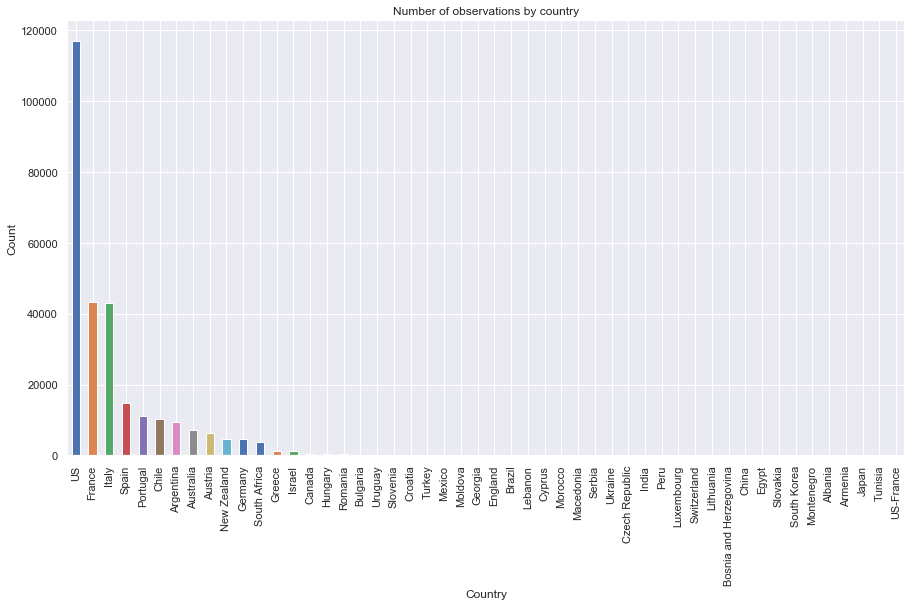

In [61]:
# second, explore the number of observations from each country
sns.set()
fig, ax = plt.subplots(figsize=(15,8))
ax = wine_all['country'].value_counts().plot(kind='bar', ax=ax)
ax.set(title='Number of observations by country', xlabel='Country', ylabel='Count')
plt.show()

From the table and the graph showing, we could see US has occupied around 41.6% data observation, which deserves a further analysis by itself

In [112]:
# filtering out the wine that is produced in US
wine_us = wine_all[wine_all['country'] == 'US']
# see how many unique variety are there in the wine produced in US
wine_us['variety'].value_counts().shape

(274,)

Since there are 274 different varieties of grapes that are used in the wine in US, we are only interested in the top10 since there is a lot of variety that only has 1 or 2 observation

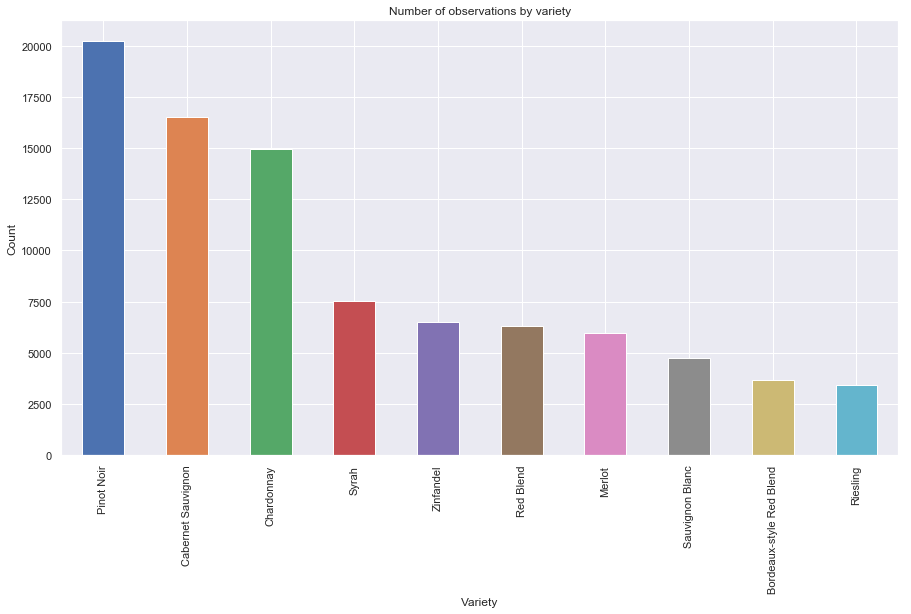

In [114]:
fig, ax = plt.subplots(figsize=(15,8))
ax = wine_us['variety'].value_counts().head(10).plot(kind='bar', ax=ax)
ax.set(title='Number of observations by variety', xlabel='Variety', ylabel='Count')
plt.show()

From the previous graph, we could tell the type of grapes that are used most in the US is Pinot Noir, which is a pretty common grape type for brewing wine